In [1]:
import numpy as np
import pandas as pd

In [18]:
# df0 = pd.read_csv("./main_dataset/03-02-2018.csv")
# bot = pd.read_csv('./attacks_data/bot.csv')
# infilteration = pd.read_csv('./attacks_data/infilteration.csv')
# multiple = pd.read_csv('./attacks_data/multiple.csv')
# multiple2 = pd.read_csv('./attacks_data/multiple2.csv')
# multiple3 = pd.read_csv('./attacks_data/multiple3.csv')
multiple4 = pd.read_csv('./attacks_data/multiple4.csv')
# multiple5 = pd.read_csv('./attacks_data/multiple5.csv')
# multiple6 = pd.read_csv('./attacks_data/multiple6.csv')
# multiple7 = pd.read_csv('./attacks_data/multiple7.csv')


In [21]:
# multiple4['Label'].unique()
multiple4.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 

In [3]:
frames = [df0, bot, infilteration, multiple, multiple2, multiple3, multiple4, multiple5, multiple6, multiple7]

df = pd.concat(frames, ignore_index = True)

In [4]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,...,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Flow ID,Src IP,Src Port,Dst IP
0,443,6,02/03/2018 08:47:38,141385,9,7,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,0.0,539.000000,655.432936,30597.30523,113.166178,9425.666667,19069.116850,73403.0,1.0,141385.0,17673.125,23965.32327,73403.0,22.0,51417.0,8569.50000,13036.89082,31525.0,1.0,0,0,0,0,192,152,63.655975,49.510203,...,225352.389700,0,0,1,1,0,0,0,1,0.0,270.375000,61.444444,539.000000,0,0,0,0,0,0,9,553,7,3773,8192,119,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,NaN,NaN,NaN,NaN
1,49684,6,02/03/2018 08:47:38,281,2,1,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,0.0,0.000000,0.000000,135231.31670,10676.156580,140.500000,174.655375,264.0,17.0,281.0,281.000,0.00000,281.0,281.0,0.0,0.00000,0.00000,0.0,0.0,1,0,0,0,40,20,7117.437722,3558.718861,...,481.333333,0,1,0,0,1,0,0,0,0.0,25.333333,19.000000,0.000000,0,0,0,0,0,0,2,38,1,0,123,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,NaN,NaN,NaN,NaN
2,443,6,02/03/2018 08:47:40,279824,11,15,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,0.0,701.800000,636.314186,41501.08640,92.915547,11192.960000,24379.448340,112589.0,1.0,279728.0,27972.800,36167.74032,112589.0,94.0,258924.0,18494.57143,36356.50372,133669.0,1.0,0,0,0,0,232,312,39.310424,53.605123,...,320621.179500,0,0,1,1,0,0,0,1,1.0,446.653846,98.727273,701.800000,0,0,0,0,0,0,11,1086,15,10527,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,NaN,NaN,NaN,NaN
3,443,6,02/03/2018 08:47:40,132,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,15151.515150,132.000000,0.000000,132.0,132.0,132.0,132.000,0.00000,132.0,132.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,40,0,15151.515150,0.000000,...,0.000000,0,0,0,0,1,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,256,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,NaN,NaN,NaN,NaN
4,443,6,02/03/2018 08:47:41,274016,9,13,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,0.0,472.384615,611.180489,27100.60726,80.287282,13048.380950,26311.627030,114077.0,1.0,273946.0,34243.250,37996.56546,114077.0,201.0,252994.0,21082.83333,39075.73819,135611.0,1.0,0,0,0,0,192,272,32.844797,47.442485,...,247262.300400,0,0,1,1,0,0,0,1,1.0,337.545455,142.777778,472.384615,0,0,0,0,0,0,9,1285,13,6141,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,NaN,NaN,NaN,NaN


In [5]:
df = df.dropna(axis=1) 

In [6]:
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,0.0,539.000000,655.432936,1.131662e+02,9425.666667,19069.116850,73403.0,1.0,141385.0,17673.125,23965.32327,73403.0,22.0,51417.0,8569.50000,13036.89082,31525.0,1.0,0,0,0,0,192,152,63.655975,49.510203,0.0,1460.0,254.470588,474.712955,225352.389700,0,0,1,1,0,0,0,1,0.0,270.375000,61.444444,539.000000,0,0,0,0,0,0,9,553,7,3773,8192,119,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,0.0,0.000000,0.000000,1.067616e+04,140.500000,174.655375,264.0,17.0,281.0,281.000,0.00000,281.0,281.0,0.0,0.00000,0.00000,0.0,0.0,1,0,0,0,40,20,7117.437722,3558.718861,0.0,38.0,19.000000,21.939310,481.333333,0,1,0,0,1,0,0,0,0.0,25.333333,19.000000,0.000000,0,0,0,0,0,0,2,38,1,0,123,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,0.0,701.800000,636.314186,9.291555e+01,11192.960000,24379.448340,112589.0,1.0,279728.0,27972.800,36167.74032,112589.0,94.0,258924.0,18494.57143,36356.50372,133669.0,1.0,0,0,0,0,232,312,39.310424,53.605123,0.0,1460.0,430.111111,566.234209,320621.179500,0,0,1,1,0,0,0,1,1.0,446.653846,98.727273,701.800000,0,0,0,0,0,0,11,1086,15,10527,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.515152e+04,132.000000,0.000000,132.0,132.0,132.0,132.000,0.00000,132.0,132.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,40,0,15151.515150,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,256,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,0.0,472.384615,611.180489,8.028728e+01,13048.380950,26311.627030,114077.0,1.0,273946.0,34243.250,37996.56546,114077.0,201.0,252994.0,21082.83333,39075.73819,135611.0,1.0,0,0,0,0,192,272,32.844797,47.442485,0.0,1460.0,322.869565,497.254764,247262.300400,0,0,1,1,0,0,0,1,1.0,337.545455,142.777778,472.384615,0,0,0,0,0,0,9,1285,13,6141,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727934,21,6,14/02/2018 12:10:09,1,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.000000e+06,1.000000,0.000000,1.0,1.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,40,20,1000000.000000,1000000.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,0,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,1,0,26883,0,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [7]:
df.dtypes

Dst Port           int64
Protocol           int64
Timestamp         object
Flow Duration      int64
Tot Fwd Pkts       int64
                  ...   
Idle Mean        float64
Idle Std         float64
Idle Max         float64
Idle Min         float64
Label             object
Length: 79, dtype: object

In [8]:
df = df.drop('Timestamp', axis=1)
df

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,141385,9,7,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,0.0,539.000000,655.432936,1.131662e+02,9425.666667,19069.116850,73403.0,1.0,141385.0,17673.125,23965.32327,73403.0,22.0,51417.0,8569.50000,13036.89082,31525.0,1.0,0,0,0,0,192,152,63.655975,49.510203,0.0,1460.0,254.470588,474.712955,225352.389700,0,0,1,1,0,0,0,1,0.0,270.375000,61.444444,539.000000,0,0,0,0,0,0,9,553,7,3773,8192,119,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,281,2,1,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,0.0,0.000000,0.000000,1.067616e+04,140.500000,174.655375,264.0,17.0,281.0,281.000,0.00000,281.0,281.0,0.0,0.00000,0.00000,0.0,0.0,1,0,0,0,40,20,7117.437722,3558.718861,0.0,38.0,19.000000,21.939310,481.333333,0,1,0,0,1,0,0,0,0.0,25.333333,19.000000,0.000000,0,0,0,0,0,0,2,38,1,0,123,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,279824,11,15,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,0.0,701.800000,636.314186,9.291555e+01,11192.960000,24379.448340,112589.0,1.0,279728.0,27972.800,36167.74032,112589.0,94.0,258924.0,18494.57143,36356.50372,133669.0,1.0,0,0,0,0,232,312,39.310424,53.605123,0.0,1460.0,430.111111,566.234209,320621.179500,0,0,1,1,0,0,0,1,1.0,446.653846,98.727273,701.800000,0,0,0,0,0,0,11,1086,15,10527,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,132,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.515152e+04,132.000000,0.000000,132.0,132.0,132.0,132.000,0.00000,132.0,132.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,40,0,15151.515150,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,256,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,274016,9,13,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,0.0,472.384615,611.180489,8.028728e+01,13048.380950,26311.627030,114077.0,1.0,273946.0,34243.250,37996.56546,114077.0,201.0,252994.0,21082.83333,39075.73819,135611.0,1.0,0,0,0,0,192,272,32.844797,47.442485,0.0,1460.0,322.869565,497.254764,247262.300400,0,0,1,1,0,0,0,1,1.0,337.545455,142.777778,472.384615,0,0,0,0,0,0,9,1285,13,6141,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727934,21,6,1,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.000000e+06,1.000000,0.000000,1.0,1.0,0.0,0.000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,40,20,1000000.000000,1000000.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,0,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,1,0,26883,0,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce
3727935,22,6,7,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.857143e+05,7.000000,0.000000,7.0,7.

In [9]:
df['Label'].unique()

array(['Benign', 'Bot', 'Infilteration', 'Brute Force -Web',
       'Brute Force -XSS', 'SQL Injection', 'DDOS attack-LOIC-UDP',
       'DDOS attack-HOIC', 'DDoS attacks-LOIC-HTTP',
       'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk',
       'DoS attacks-GoldenEye', 'DoS attacks-Slowloris', 'FTP-BruteForce',
       'SSH-Bruteforce'], dtype=object)

In [10]:
df.Label.value_counts()

Benign                      762384
DDOS attack-HOIC            686012
DDoS attacks-LOIC-HTTP      576191
Bot                         572382
DoS attacks-Hulk            461912
FTP-BruteForce              193360
SSH-Bruteforce              187589
DoS attacks-SlowHTTPTest    139890
Infilteration                93063
DoS attacks-GoldenEye        41508
DoS attacks-Slowloris        10990
DDOS attack-LOIC-UDP          1730
Brute Force -Web               611
Brute Force -XSS               230
SQL Injection                   87
Name: Label, dtype: int64

<AxesSubplot:>

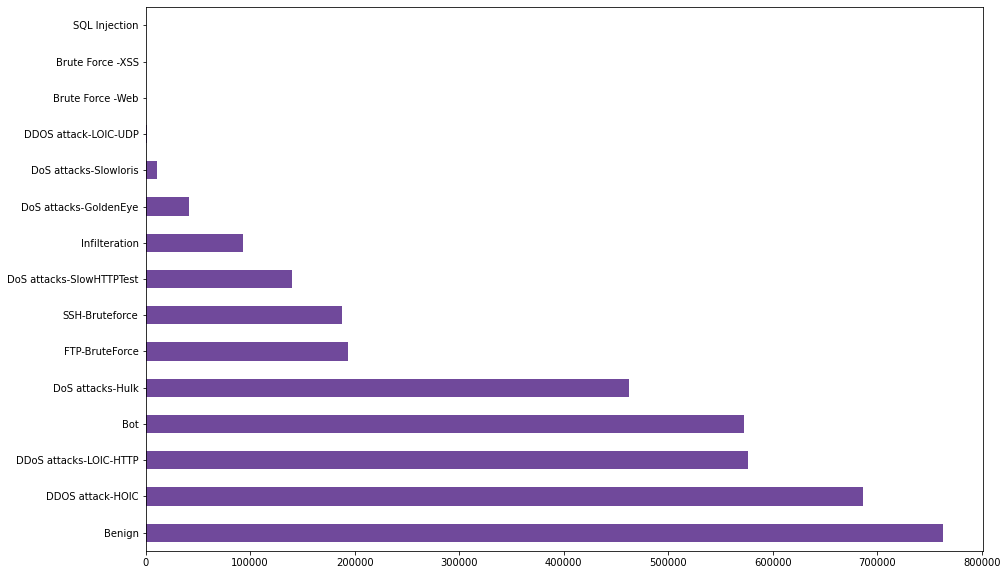

In [23]:
# df.plot(figsize=(5,3))
df['Label'].value_counts().plot(kind='barh', color='#70499B', figsize=(15, 10))

In [19]:
# df.to_csv('./attacks_data/merged_attacks_benign.csv', index=False)

In [27]:
# SQL_Injection_count = df[df['Label'] == 'SQL Injection'].value_counts()
# SQL_Injection = df[df['Label'] == 'SQL Injection']

In [16]:
# class count
Benign = df[df['Label'] == 'Benign']
Bot = df[df['Label'] == 'Bot']
Infilteration = df[df['Label'] == 'Infilteration']
Brute_Force_Web = df[df['Label'] == 'Brute Force -Web']
Brute_Force_XSS = df[df['Label'] == 'Brute Force -XSS']
SQL_Injection = df[df['Label'] == 'SQL Injection']
DDOS_attack_LOIC_UDP = df[df['Label'] == 'DDOS attack-LOIC-UDP']
DDOS_attack_HOIC = df[df['Label'] == 'DDOS attack-HOIC']
DDoS_attacks_LOIC_HTTP = df[df['Label'] == 'DDoS attacks-LOIC-HTTP']
DoS_attacks_SlowHTTPTest = df[df['Label'] == 'DoS attacks-SlowHTTPTest']
DoS_attacks_Hulk= df[df['Label'] == 'DoS attacks-Hulk']
DoS_attacks_GoldenEye = df[df['Label'] == 'DoS attacks-GoldenEye']
DoS_attacks_Slowloris = df[df['Label'] == 'DoS attacks-Slowloris']
FTP_BruteForce = df[df['Label'] == 'FTP-BruteForce']
SSH_Bruteforce = df[df['Label'] == 'SSH-Bruteforce']


In [17]:
SQL_Injection_ov = SQL_Injection.sample(686012, replace=True)
Brute_Force_XSS_ov = Brute_Force_XSS.sample(686012, replace=True)
Brute_Force_Web_ov = Brute_Force_Web.sample(686012, replace=True)
DDOS_attack_LOIC_UDP_ov = DDOS_attack_LOIC_UDP.sample(686012, replace=True)
DoS_attacks_Slowloris_ov = DoS_attacks_Slowloris.sample(686012, replace=True)
DoS_attacks_GoldenEye_ov = DoS_attacks_GoldenEye.sample(686012, replace=True)
Infilteration_ov = Infilteration.sample(686012, replace=True)
DoS_attacks_SlowHTTPTest_ov = DoS_attacks_SlowHTTPTest.sample(686012, replace=True)
SSH_Bruteforce_ov = SSH_Bruteforce.sample(686012, replace=True)
FTP_BruteForce_ov = FTP_BruteForce.sample(686012, replace=True)
DoS_attacks_Hulk_ov = DoS_attacks_Hulk.sample(686012, replace=True)
Bot_ov = Bot.sample(686012, replace=True)
DDoS_attacks_LOIC_HTTP_ov = DDoS_attacks_LOIC_HTTP.sample(686012, replace=True)

# class_count_0, class_count_1 = data['Label'].value_counts()

In [18]:
dff = pd.concat([SQL_Injection_ov, Brute_Force_XSS_ov, Brute_Force_Web_ov, DDOS_attack_LOIC_UDP_ov, DoS_attacks_Slowloris_ov, DoS_attacks_GoldenEye_ov, \
                 Infilteration_ov, DoS_attacks_SlowHTTPTest_ov, SSH_Bruteforce_ov, FTP_BruteForce_ov, DoS_attacks_Hulk_ov, Bot_ov, \
                DDoS_attacks_LOIC_HTTP_ov, Benign, DDOS_attack_HOIC], axis=0)

# print("total :", test_under['Class'].value_counts())# plot the count after under-sampeling
# test_over['Class'].value_counts().plot(kind='bar', title='count (target)')

In [19]:
# dff

In [20]:
dff.Label.value_counts()

Benign                      762384
SQL Injection               686012
Brute Force -XSS            686012
Brute Force -Web            686012
DDOS attack-LOIC-UDP        686012
DoS attacks-Slowloris       686012
DoS attacks-GoldenEye       686012
Infilteration               686012
DoS attacks-SlowHTTPTest    686012
SSH-Bruteforce              686012
FTP-BruteForce              686012
DoS attacks-Hulk            686012
Bot                         686012
DDoS attacks-LOIC-HTTP      686012
DDOS attack-HOIC            686012
Name: Label, dtype: int64

<AxesSubplot:>

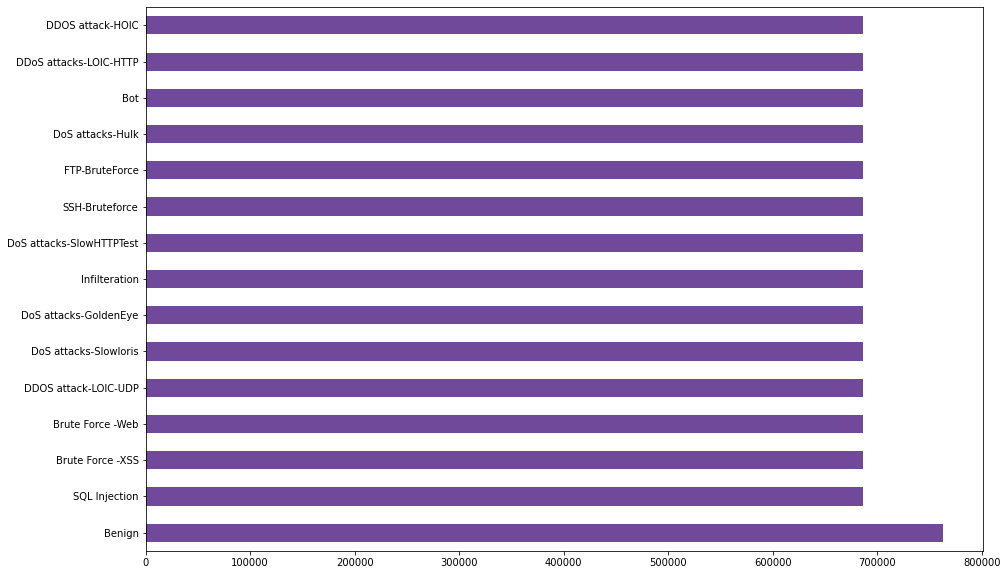

In [22]:
dff['Label'].value_counts().plot(kind='barh', color='#70499B', figsize=(15, 10))

In [25]:
dff.to_csv('./attacks_data/balanced_dataset.csv', index=False)

In [26]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_under['Class'].value_counts())# plot the count after under-sampeling
test_over['Class'].value_counts().plot(kind='bar', title='count (target)')

NameError: name 'class_1' is not defined

In [ ]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['Class'].value_counts())# plot the count after under-sampeling
test_under['Class'].value_counts().plot(kind='bar', title='count (target)')